In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import DivergingNorm

In [2]:
# Scanpy config
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
# Read in the clustered flux analysis data
master_dir = '../'
adata = sc.read_h5ad(master_dir + 'data/PBMC/fo8_thru_in8_PRO_for_MONOCYTES.h5ad')

In [9]:
celltype = 'Monocyte'
adata_gex = sc.read_h5ad(master_dir + 'output/' + celltype + '-processed-analyzed.h5ad')
adata_gex_metab = sc.read_h5ad(master_dir + 'output/' + celltype + '-processed-analyzed-metab.h5ad')
# Read new adata_metab analysis
results_file_metab_genes_new = master_dir + 'output/' + celltype + '-processed-analyzed-metab-new.h5ad'
adata_gex_metab = sc.read(results_file_metab_genes_new)

In [6]:
# All the proteins
for name in adata.var_names:
    print(name)

CD80-1
CD86-1
CD274_B7-H1_PD-L1
CD273_B7-DC_PD-L2
CD275_B7-H2_ICOSL
CD11B
CD252_OX40L
CD137L_4-1BB_Ligand
CD155_PVR
CD112_NECTIN-2
CD47-1
CD70-1
CD30
CD40-1
CD154
CD52-1
CD3
CD8
CD56_NCAM
CD19-1
CD33-1
CD11C
CD34-1
CD269_BCMA
HLA-A-B-C
CD90_Thy1
CD117_c-Kit
CD10
CD45RA
CD123
CD7-1
CD49F
CD194_CCR4
CD4-1
CD44-1
CD14-1
CD16
CD25
CD45RO
CD279_PD-1
TIGIT_VSTM3
Mouse_IgG1_Isotype-Control
Mouse_IgG2a_Isotype-Control
Mouse_IgG2b_Isotype-Control
Rat_IgG2b_Isotype-Control
CD20
CD335_NKp46
CD294_CRTH2
CD326_Ep-CAM
CD31
Podoplanin
CD146
CD324_E-Cadherin
IgM
CD5-1
TCR-G-D
CD183_CXCR3
CD195_CCR5
CD32
CD196_CCR6
CD185_CXCR5
CD103_Integrin-AE
CD69-1
CD62L
CD197_CCR7
CD161
CD152_CTLA-4
CD223_LAG-3
KLRG1_MAFA
CD27-1
CD107A_LAMP-1
CD95-FAS
HLA-DR
CD1C-1
CD64
CD141_Thrombomodulin
CD1D-1
CD314_NKG2D
CD66B
CD35
CD57_Recombinant
CD366_Tim-3
CD272_BTLA
CD278_ICOS
CD58_LFA-3
CD96_TACTILE
CD39
CD178_FAS-L
CX3CR1-1
CD24-1
CD21
CD11A
IgA
CD79_IgB
CD66A-C-E
CD244_2B4
CD235AB
CD206_MMR
CD169_Sialoadhesin_Siglec-1


In [10]:
adata_gex = adata_gex[adata_gex.obs.index.isin(adata.obs.index)]
adata_gex_metab = adata_gex_metab[adata_gex_metab.obs.index.isin(adata.obs.index)]

In [16]:
# Bring protein markers to adata_gex and adata_gex_metab
markers = ['CD36-1', 'B7-H4', 'CD35', 'CD16', 'CD2-1', 'CD90_Thy1', 'FcERIA', 'HLA-DR', 'CD14-1']
for marker in markers:
    adata_gex.obs[marker] = np.array(adata[:, marker].X.todense()).flatten()
    adata_gex_metab.obs[marker] = np.array(adata[:, marker].X.todense()).flatten()

In [12]:
adata_gex.obs['louvain_metab'] = adata_gex_metab.obs['louvain']
adata_gex_metab.obs['leiden_all'] = adata_gex.obs['leiden']

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


<ipython-input-9-014235c0ad29>:2: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  cmap='afmhot', norm=DivergingNorm(10))


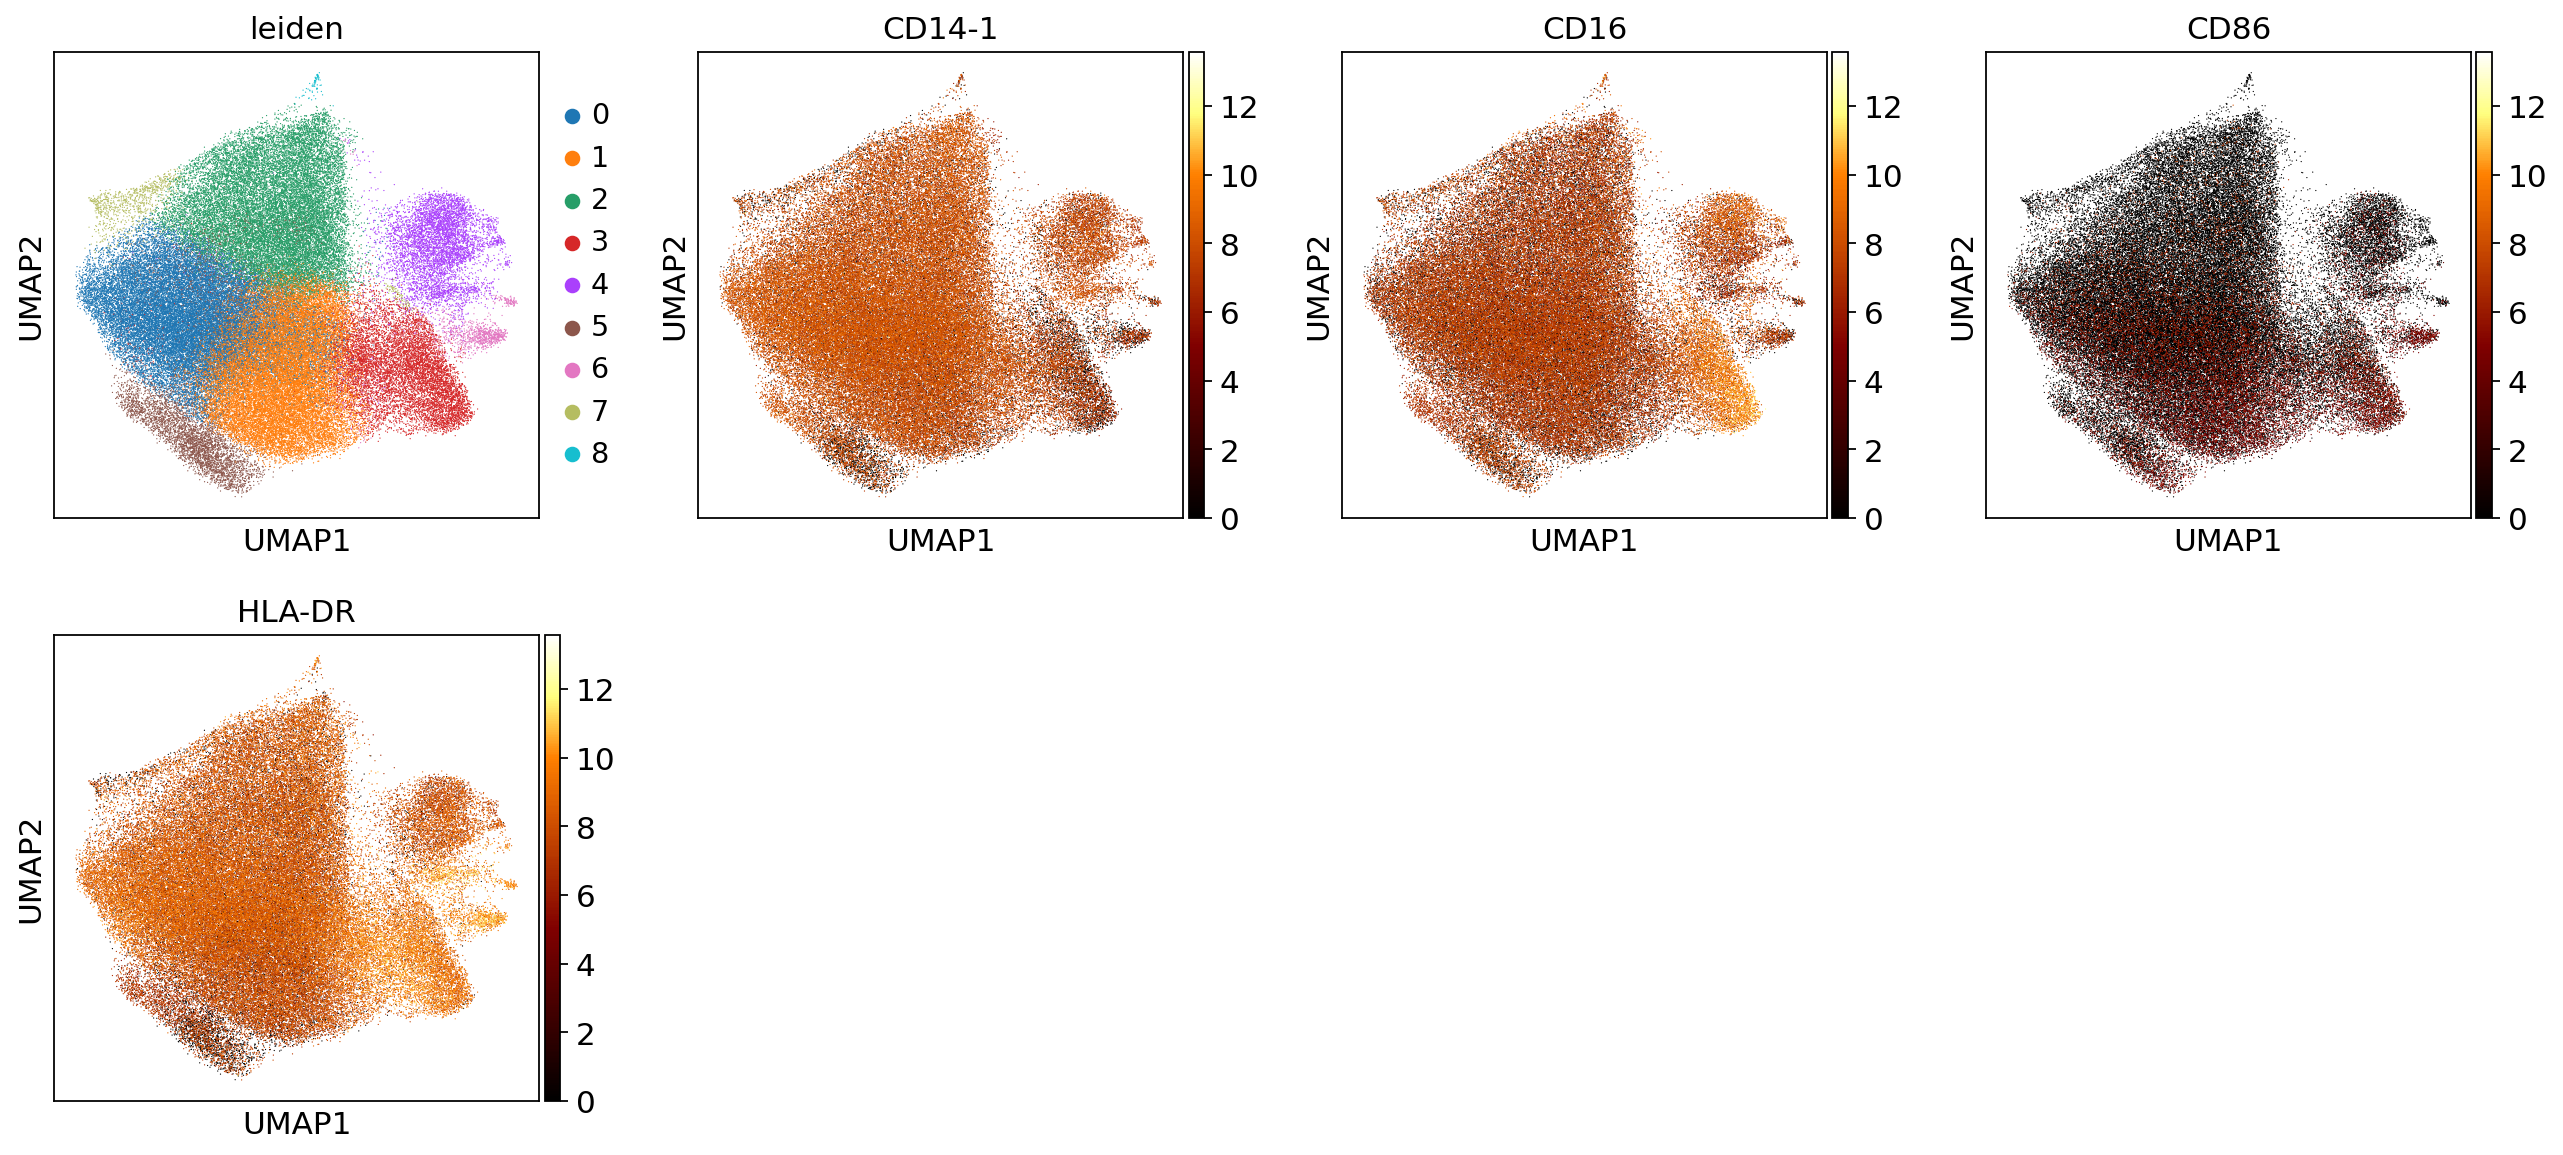

In [9]:
#sc.pl.umap(adata_gex, color=['leiden', 'CD14-1', 'CD16', 'CD86', 'HLA-DR'], 
#           cmap='afmhot', norm=DivergingNorm(10))

<ipython-input-10-6e90a9a5a08b>:2: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  cmap='afmhot', norm=DivergingNorm(10))


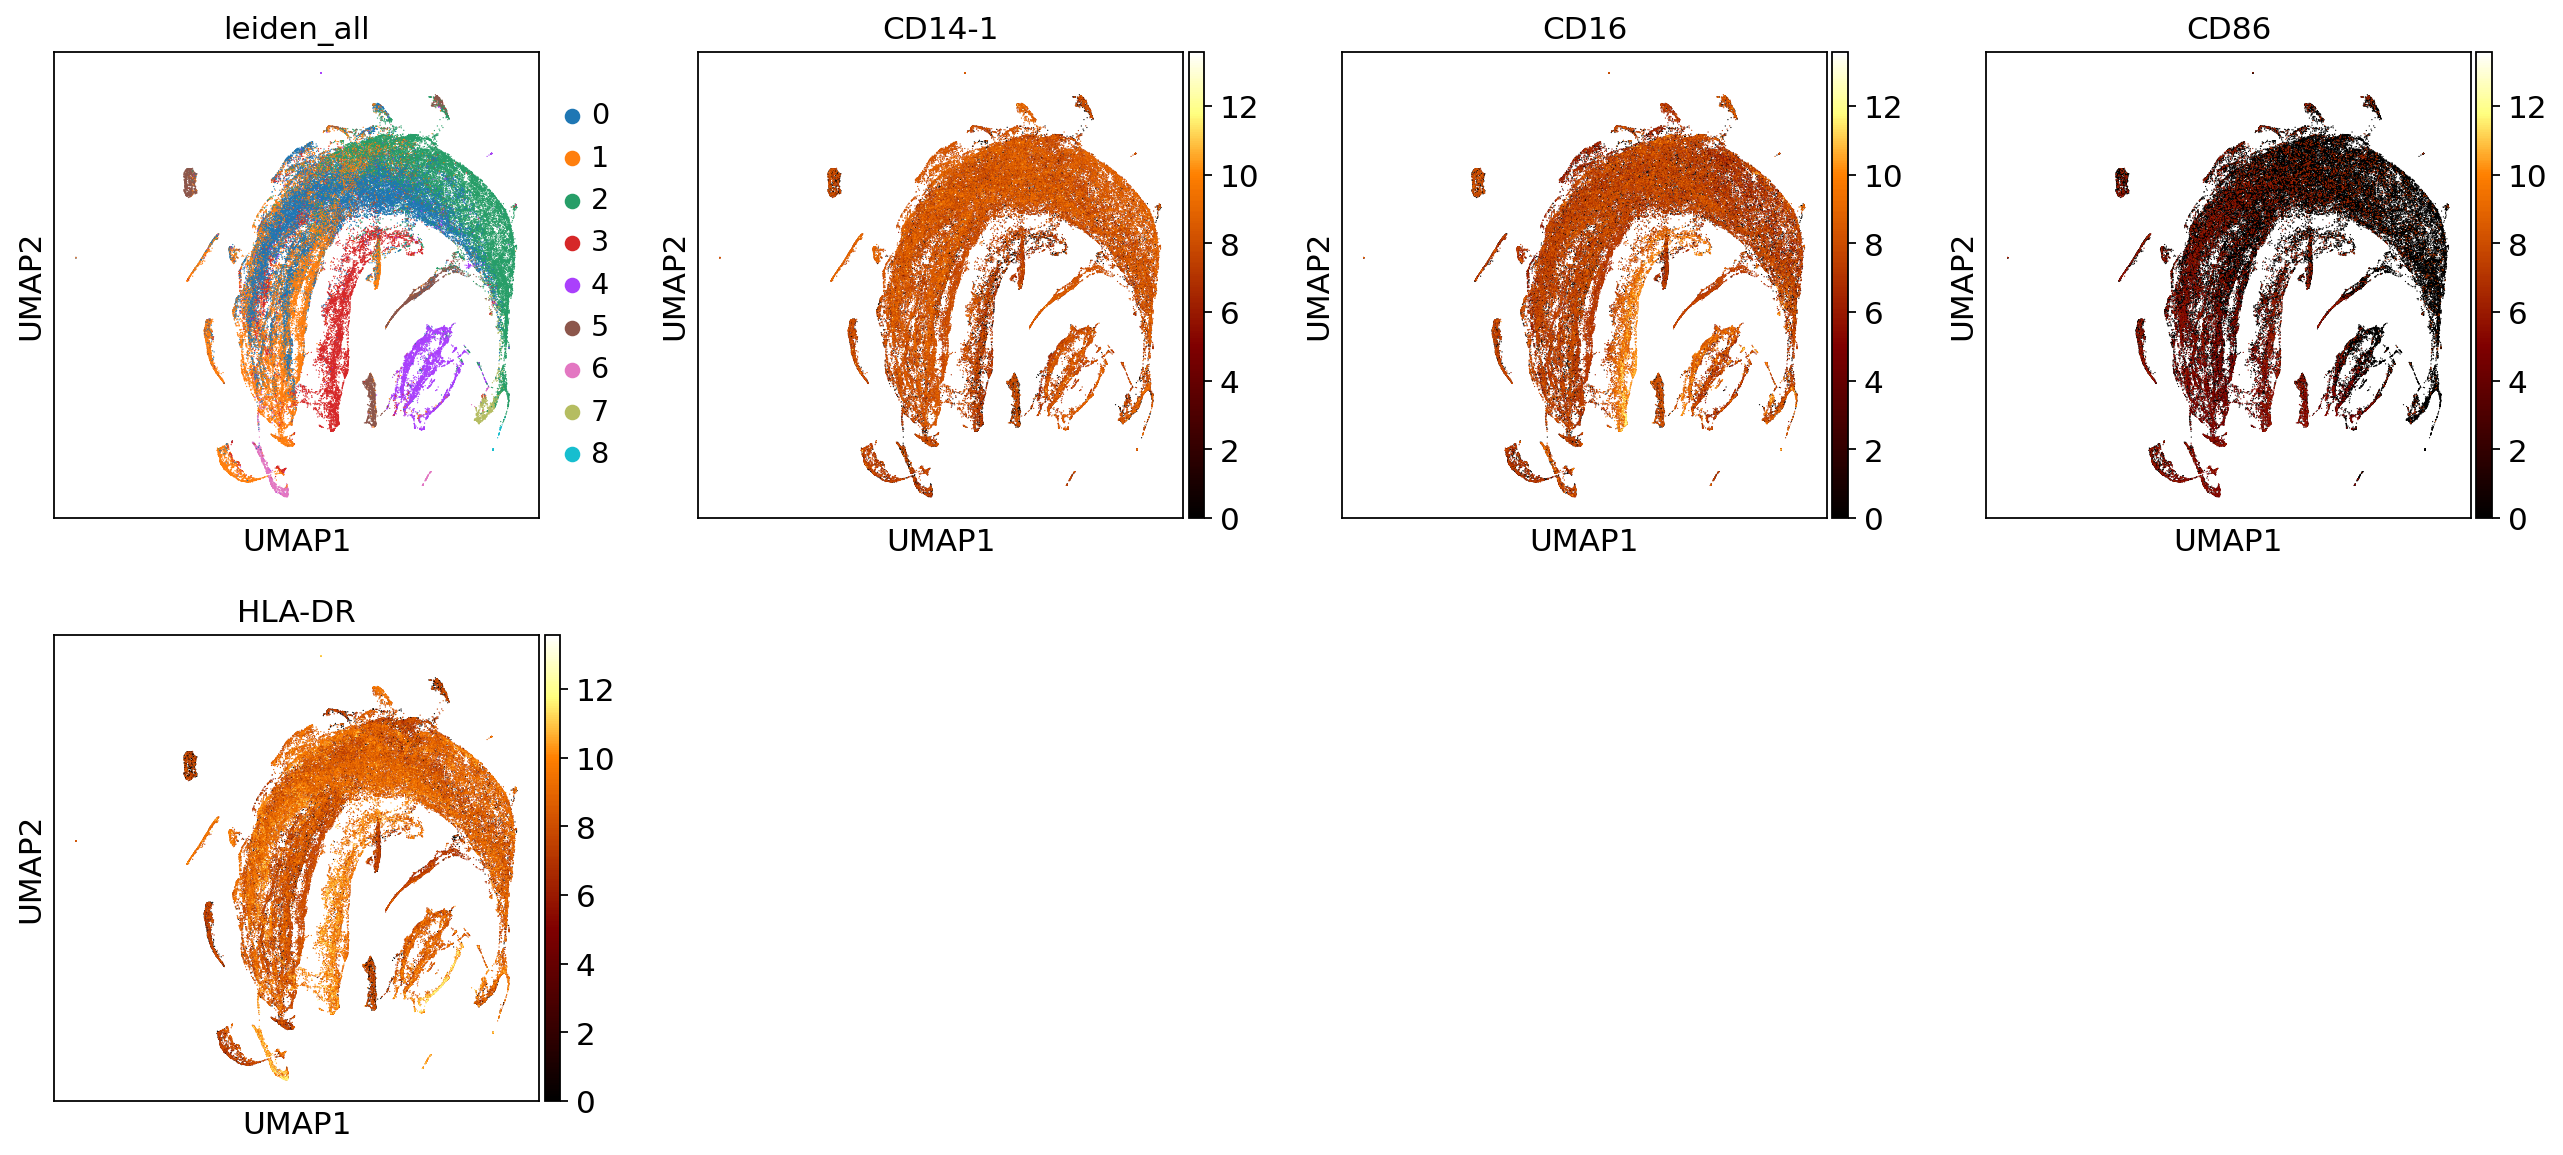

In [10]:
sc.pl.umap(adata_gex_metab, color=['leiden_all', 'CD14-1', 'CD16', 'CD86', 'HLA-DR'], 
           cmap='afmhot', norm=DivergingNorm(10))

<ipython-input-11-bb00481d2a0c>:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  fig = sns.heatmap(df.transpose(), cmap='afmhot', norm=DivergingNorm(6))


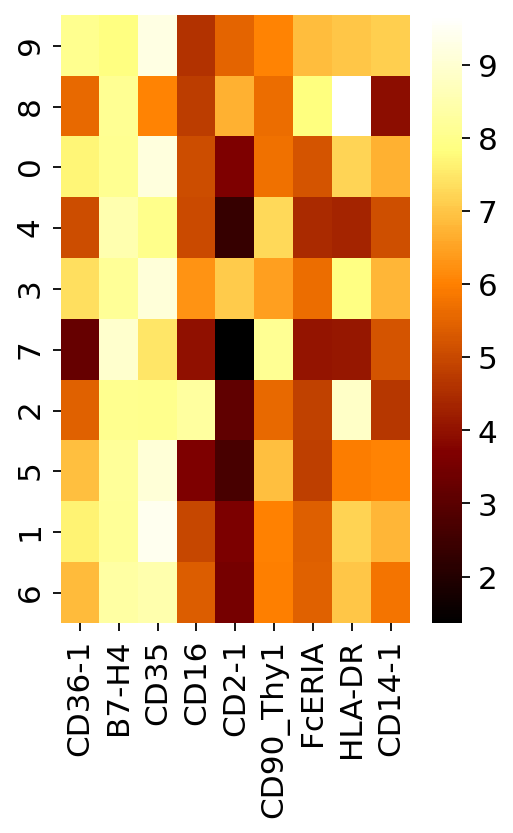

In [11]:
# T cell markers
df = pd.DataFrame(columns=adata_gex.obs['louvain_metab'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['louvain_metab']==col].obs.loc[:, markers], axis=0)
#df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers, index=markers), df, left_index=True, right_index=True)
df = df.drop(columns=0)
# Reproduce ordering of clusters from metabolic gene clustermap
df = df.loc[:, ['6', '1', '5', '2', '7', '3', '4', '0', '8', '9'][::-1]]
#sns.clustermap(df.transpose(), col_cluster=False, cmap='plasma', figsize=(3, 5))
fig = plt.figure(figsize=(3.5, 5))
fig = sns.heatmap(df.transpose(), cmap='afmhot', norm=DivergingNorm(6))

<ipython-input-16-dcf7f379363d>:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  fig = sns.heatmap(df.transpose(), cmap='afmhot', norm=DivergingNorm(6))


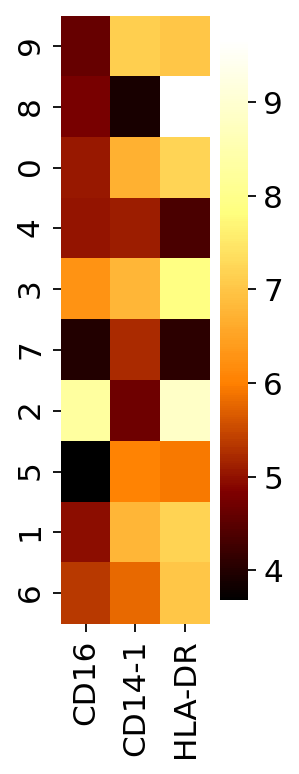

In [16]:
# T cell markers
markers_simp = ['CD16', 'CD14-1', 'HLA-DR']
df = pd.DataFrame(columns=adata_gex.obs['louvain_metab'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers_simp))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['louvain_metab']==col].obs.loc[:, markers_simp], axis=0)
#df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers_simp, index=markers_simp), df, left_index=True, right_index=True)
df = df.drop(columns=0)
# Reproduce ordering of clusters from metabolic gene clustermap
df = df.loc[:, ['6', '1', '5', '2', '7', '3', '4', '0', '8', '9'][::-1]]
#sns.clustermap(df.transpose(), col_cluster=False, cmap='plasma', figsize=(3, 5))
fig = plt.figure(figsize=(1.5, 5))
fig = sns.heatmap(df.transpose(), cmap='afmhot', norm=DivergingNorm(6))

<ipython-input-116-ec44a90ce960>:21: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  palette='afmhot', edgecolor='black', linewidth=1, norm=DivergingNorm(6))


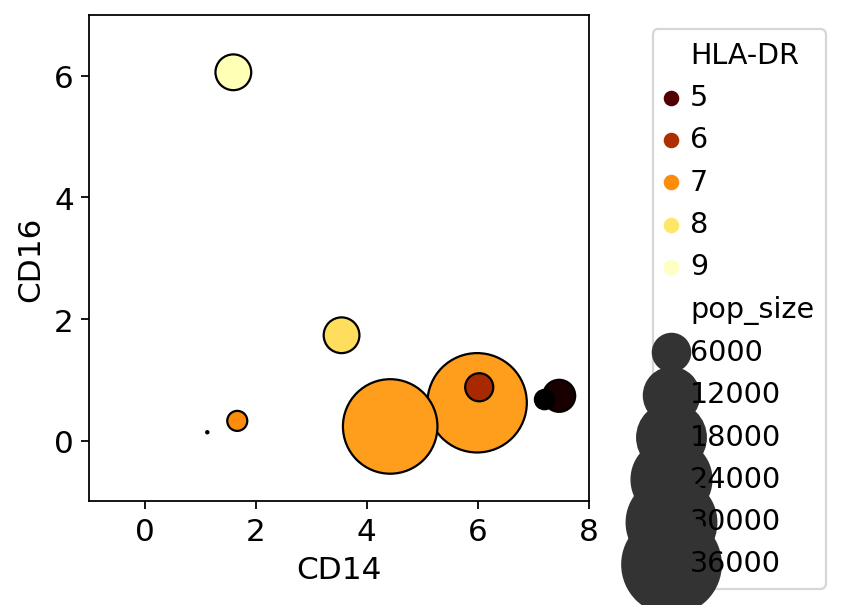

In [116]:
adata_gex.obs['CD14-1-gex'] = adata_gex.X[:, np.where(adata_gex.var_names=='CD14')].flatten()
adata_gex.obs['CD16-gex'] = adata_gex.X[:, np.where(adata_gex.var_names=='FCGR3A')].flatten()
markers_simp = ['CD14-1-gex', 'CD16-gex', 'HLA-DR']
df = pd.DataFrame(columns=adata_gex.obs['louvain_metab'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers_simp))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['louvain_metab']==col].obs.loc[:, markers_simp], axis=0)
#df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers_simp, index=markers_simp), df, left_index=True, right_index=True)
df = df.drop(columns=0)
# Reproduce ordering of clusters from metabolic gene clustermap
df = df.loc[:, ['6', '1', '5', '2', '7', '3', '4', '0', '8', '9'][::-1]]
#sns.clustermap(df.transpose(), col_cluster=False, cmap='plasma', figsize=(3, 5))
#fig = plt.figure(figsize=(1.5, 5))
#fig = sns.heatmap(df.transpose(), cmap='afmhot', norm=DivergingNorm(6))
df = df.transpose()
df['pop_size'] = adata_gex.obs.groupby(['louvain_metab'])['louvain_metab'].value_counts().loc[df.index].values
df = df.drop(['9']) # Cluster 9 is likely an extraneous group (only 20 cells, no valid gene expression data)
fig = sns.scatterplot(data=df, x='CD14-1-gex', y='CD16-gex', size='pop_size', sizes=(1, 2000), hue='HLA-DR', 
                      palette='afmhot', edgecolor='black', linewidth=1, norm=DivergingNorm(6))
plt.xlabel('CD14')
plt.ylabel('CD16')
plt.ylim([-1, 7])
plt.xlim([-1, 8])
plt.grid(False)
plt.legend(bbox_to_anchor=[1.1, 1])

In [100]:
df

,CD14-1-gex,CD16-gex,HLA-DR,pop_size
8,1.126855,0.138267,9.675772,995
0,5.991758,0.622827,7.209028,36651
4,7.470757,0.737542,4.367749,4684
3,3.547589,1.733582,7.894067,5592
7,7.207255,0.675638,4.092033,2325
2,1.596653,6.058764,8.864084,5601
5,6.029565,0.878169,5.930795,3825
1,4.424368,0.233722,7.192150,33242
6,1.667420,0.325035,7.010997,2426


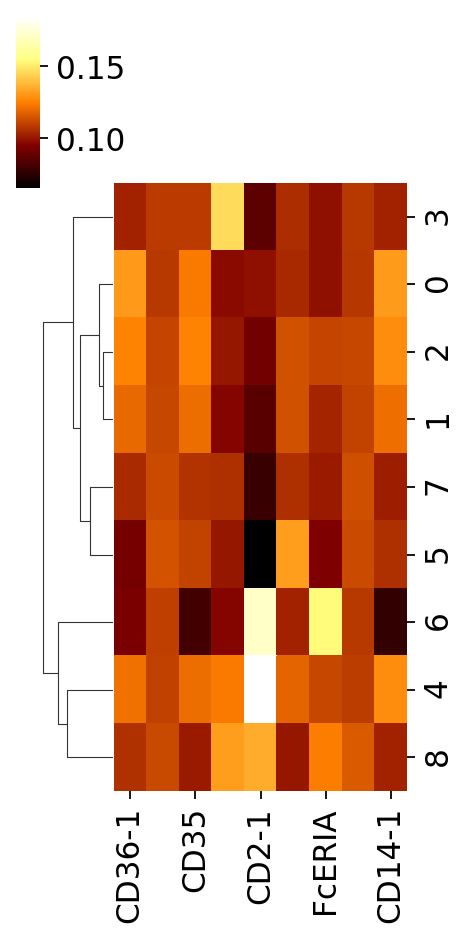

In [12]:
df = pd.DataFrame(columns=adata_gex.obs['leiden'].unique(), 
                  index=adata_gex.obs.columns[np.where(adata_gex.obs.columns.isin(markers))[0]])
for col in df.columns:
    df[col] = np.mean(adata_gex[adata_gex.obs['leiden']==col].obs.loc[:, markers], axis=0)
df = (df.transpose() / np.sum(df, axis=1)).transpose()
df = pd.merge(pd.DataFrame(markers, index=markers), df, left_index=True, right_index=True)
df = df.drop(columns=0)
sns.clustermap(df.transpose(), col_cluster=False, cmap='afmhot', figsize=(3, 6))
#sns.heatmap(df)

In [13]:
np.mean(adata_gex[adata_gex.obs['louvain_metab']==col].obs.loc[:, markers], axis=0)

CD36-1              6.910723
B7-H4               8.204138
CD35                9.077497
CD16                3.678588
CD2-1               2.695114
CD90_Thy1           6.891700
FcERIA              4.831645
CD138_Syndecan-1    9.193586
CD14-1              6.047229
dtype: float32